### Install SLOPpy before  running the jupyter notebook
Go to the main folder of the code and execute from terminal:

```{code} bash
pip install .
```

You may need to reload the kernel of your Jupyter Notebook 

In [2]:

import SLOPpy
from SLOPpy.subroutines.io_subroutines import *
from SLOPpy.subroutines.common import *
from SLOPpy.subroutines.shortcuts import *
from SLOPpy.subroutines.plot_subroutines import *

#%matplotlib notebook
%matplotlib widget

In [3]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Baseline working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/Users/malavolta/Astro/ExoAtmospheres/wasp-69')
print("Current working directory: {0}".format(os.getcwd()))

Baseline working directory: /Users/malavolta/Astro/CODE/SLOPpy_development/plots_scripts
Current working directory: /Users/malavolta/Astro/ExoAtmospheres/wasp-69


### Line set selection
This Jupyter notebook works with only a line set at a time, so pick your
favourte from those listed in the configuration file and copy it into the 
`lines_label` variable


In [6]:
file_conf = 'WASP-69_transit.yaml'
config_in = load_yaml_file(file_conf)

for lines_label in config_in['spectral_lines']:
    print(lines_label)

lines_label = 'Na_doublet'

Na_doublet


In [7]:


night_dict = from_config_get_nights(config_in)
planet_dict = from_config_get_planet(config_in)
star_dict = from_config_get_star(config_in)
clv_rm_dict = from_config_get_clv_rm(config_in)

spectral_lines = from_config_get_spectral_lines(config_in)
line_iter_dict = spectral_lines[lines_label]
sampler_pams = line_iter_dict['sampler_parameters']
sampler_name = sampler_pams.get('sampler_name', 'emcee')

subroutine_name = 'transmission_binned_mcmc'
#night_list = night_dict

reference = 'planet_RF'

""" Use this if you want to generate only the full corner plot """
night_list = [''] 

append_name = None

### Additional steps to produce nicer corner plots

1) Check the name of the parameters - they are automatically generated by SLOPpy
Mind the spaces inside the variable name! 



In [8]:
for night in night_list:
    results_dict = load_from_cpickle(subroutine_name+'_'+sampler_name+'_results', config_in['output'], night, lines_label)
    print("  Parameters for transmission MCMC analysis for lines {0:s}, night: {1:s} ".format(
        lines_label, night))
    print()
    pams_dict = results_dict['pams_dict']

    for key_val, key_index in pams_dict.items():
        print("     '"+key_val+"'")

  Parameters for transmission MCMC analysis for lines Na_doublet, night:  

     'D1_contrast'
     'D1_fwhm (km/s)'
     'D1_winds  (km/s)'
     'D2_contrast'
     'D2_fwhm (km/s)'
     'D2_winds  (km/s)'
     'rp_factor'
     'K_planet  (km/s)'
     'jitter_0'
     'jitter_1'
     'jitter_2'
     'jitter_3'


2) sleect your preferred variable and make a dictinary to associate a new label
   to each dictionary. The order in the dictinary will define the order in the
   corner plot

   the structure of the dictionary is the following:
    kwyword: (label, plot_boundaries), 
    plot_boundaries must be either None or a tuple (a, b)

In [9]:
# NOTE: random values put as example
corner_variables = {
     'rp_factor': ['$r_\mathrm{p} factor$', (0.85, 1.15) ],
     'K_planet  (km/s)': ['$K_\mathrm{p}$', None ],
     'D1_contrast': ['$D_\mathrm{1} c$', (0.00, 0.050) ],
     'D1_fwhm (km/s)':['$D_\mathrm{1} FWHM$', None ],
     'D1_winds  (km/s)': ['$D_\mathrm{1} wind$', (-30, 30) ],
     'D2_contrast': ['$D_\mathrm{2} c$', (0.00, 0.050) ],
     'D2_fwhm (km/s)':['$D_\mathrm{2} FWHM$', None ],
     'D2_winds  (km/s)': ['$D_\mathrm{2} wind$', (-10, 10) ],

}


   Transmission MCMC analysis for lines Na_doublet, night:   already performed
   *** sampler output 
rp_factor                    6      0.985694       0.047606      0.047133 (15-84 p) ([ 0.500000,  2.500000]) (start:  0.988758)
K_planet  (km/s)             7    126.838133      10.567562     10.102567 (15-84 p) ([52.022527, 202.022527]) (start: 126.861570)
D1_contrast                  0      0.002891       0.001837      0.003648 (15-84 p) ([ 0.000000,  0.200000]) (start:  0.004442)
D1_fwhm (km/s)               1     15.070661      11.922196     19.321523 (15-84 p) ([ 0.000000, 100.000000]) (start: 10.922593)
D1_winds  (km/s)             2     -2.132902       9.787160     14.184826 (15-84 p) ([-25.000000, 25.000000]) (start: -11.301539)
D2_contrast                  3      0.018804       0.005059      0.006579 (15-84 p) ([ 0.000000,  0.200000]) (start:  0.023530)
D2_fwhm (km/s)               4     11.138139       3.978051      4.811094 (15-84 p) ([ 0.000000, 100.000000]) (start:  7.8378

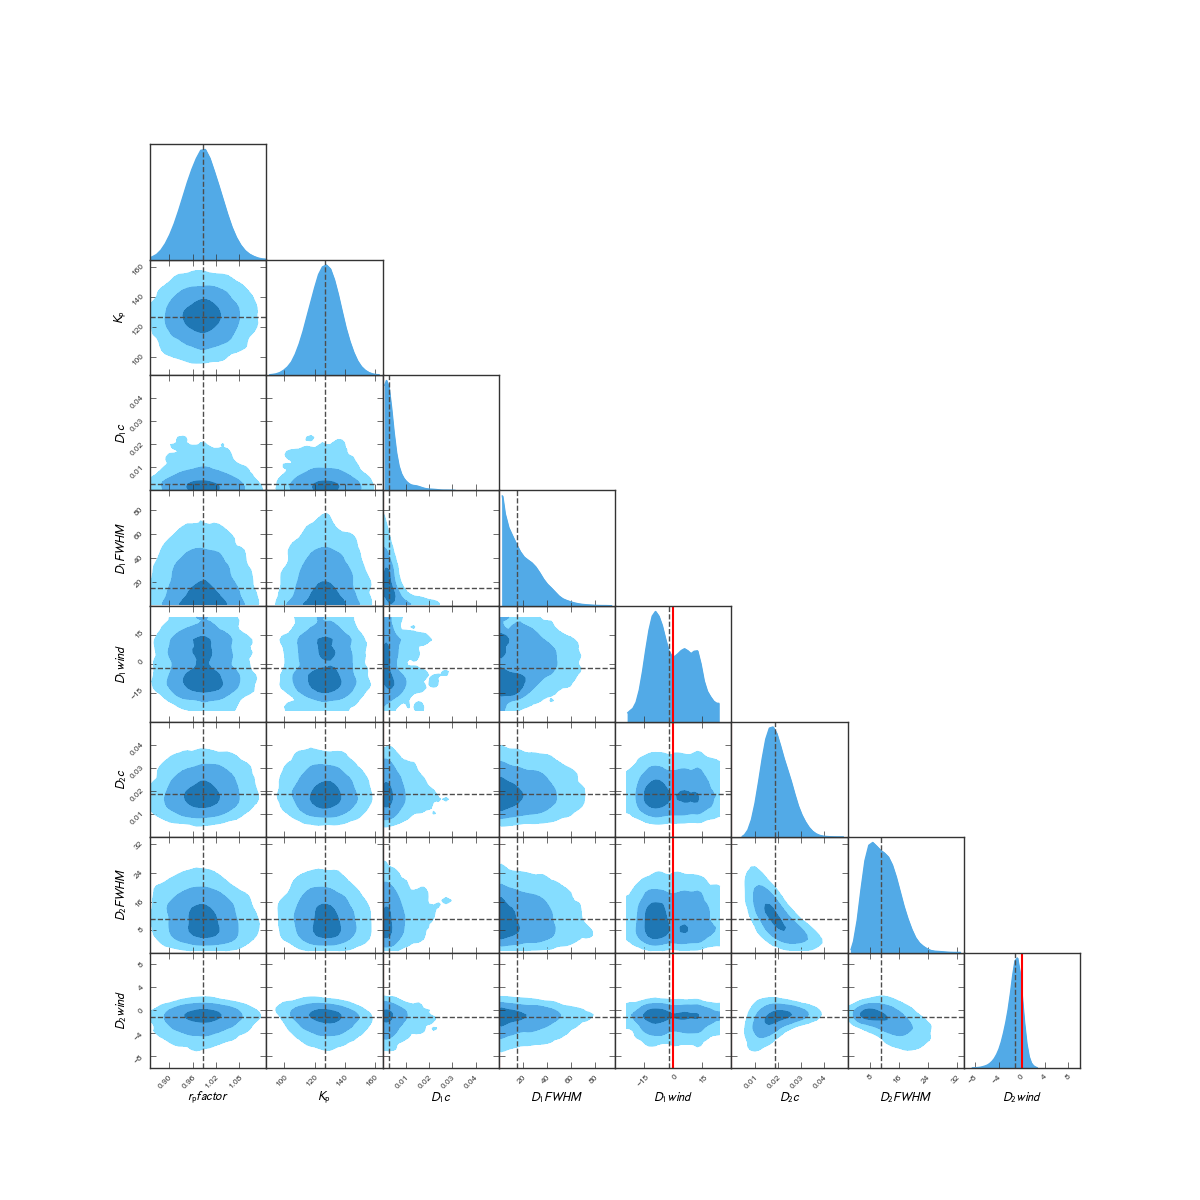

In [14]:
for night in night_list:

    results_dict = load_from_cpickle(subroutine_name+'_'+sampler_name+'_results', config_in['output'], night, lines_label)
    print("   Transmission MCMC analysis for lines {0:s}, night: {1:s}  already performed".format(
        lines_label, night))

    os.system('mkdir -p plots' )

    pams_dict = results_dict['pams_dict']
    chain_med = results_dict['chain_med']
    lnprob_med = results_dict['lnprob_med']
    boundaries = results_dict['boundaries']
    flat_chain = results_dict['flat_chain']
    flat_lnprob = results_dict['flat_lnprob']
    nthin = results_dict['nthin']
    nsteps = results_dict['nsteps']
    nburnin = results_dict['nburnin']
    
    sampler_chain = results_dict['sampler_chain']

    start_average = np.average(results_dict['point_start'], axis=0)
    ndim = results_dict['ndim']
    med_lines_model = results_dict['results']['lines_model']

    if 'derived' in results_dict:
        recompute_derived = False
    else:
        recompute_derived = True
        results_dict['derived'] = {}

    # TODO improve output
    print('   *** sampler output ')

    sample_size = np.size(flat_chain, axis=0)
    dimen_size = len(corner_variables)

    corner_plot = {
        'samples': np.zeros([sample_size, dimen_size]),
        'labels': [],
        'truths': [],
        'range': [],
        'chain_med': np.zeros([3, dimen_size]),
    }

    i_corner = 0
    for key, plot_tuple in corner_variables.items():

        val = pams_dict[key]
        print('{0:24s}  {1:4d}  {2:12f}   {3:12f}  {4:12f} (15-84 p) ([{5:9f}, {6:9f}]) (start: {7:9f})'.format(key, val,
                                                                                                chain_med[val,0],
                                                                                                chain_med[val,2],
                                                                                                chain_med[val,1],
                                                                                                boundaries[val, 0],
                                                                                                boundaries[val, 1],
                                                                                                start_average[val]))

        corner_plot['samples'][:, i_corner] = flat_chain[:, val]
        corner_plot['labels'].append(plot_tuple[0])
        corner_plot['truths'].append(chain_med[val, 0])
        corner_plot['range'].append(plot_tuple[1])
        corner_plot['chain_med'][:, i_corner] = chain_med[val, :]

        i_corner += 1

        #    R(h) = np.sqrt(1+h/delta)

        #    print(key[-8:], key[:3])

    print('   *** corner plot using pyGTC output ')

    filename_rad = subroutine_name + '_' + reference + '_MOD_cornerplot' 
    output_file = get_filename(filename_rad, config_in['output'], night=night, lines=lines_label, extension='.pdf')
    print('   *** filename: ', output_file)

    GTC = pygtc.plotGTC(chains=corner_plot['samples'],
                        paramNames=tuple(corner_plot['labels']),
                        truths=corner_plot['truths'],
                        GaussianConfLevels=True,
                        nConfidenceLevels=3,
                        figureSize=12,
                        labelRotation= (True,True),
                        paramRanges=tuple(corner_plot['range']),
                        plotName='plots/'+output_file)
    GTC = None


    continue

In [19]:
import corner 
for night in night_list:

    results_dict = load_from_cpickle(subroutine_name+'_'+sampler_name+'_results', config_in['output'], night, lines_label)
    print("   Transmission MCMC analysis for lines {0:s}, night: {1:s}  already performed".format(
        lines_label, night))

    os.system('mkdir -p plots' )

    pams_dict = results_dict['pams_dict']
    chain_med = results_dict['chain_med']
    lnprob_med = results_dict['lnprob_med']
    boundaries = results_dict['boundaries']
    flat_chain = results_dict['flat_chain']
    flat_lnprob = results_dict['flat_lnprob']
    nthin = results_dict['nthin']
    nsteps = results_dict['nsteps']
    nburnin = results_dict['nburnin']
    
    sampler_chain = results_dict['sampler_chain']

    start_average = np.average(results_dict['point_start'], axis=0)
    ndim = results_dict['ndim']
    med_lines_model = results_dict['results']['lines_model']

    if 'derived' in results_dict:
        recompute_derived = False
    else:
        recompute_derived = True
        results_dict['derived'] = {}

    # TODO improve output
    print('   *** sampler output ')

    sample_size = np.size(flat_chain, axis=0)
    dimen_size = len(corner_variables)

    corner_plot = {
        'samples': np.zeros([sample_size, dimen_size]),
        'labels': [],
        'truths': [],
        'range': [],
        'chain_med': np.zeros([3, dimen_size]),
    }

    i_corner = 0
    for key, plot_tuple in corner_variables.items():

        val = pams_dict[key]
        print('{0:24s}  {1:4d}  {2:12f}   {3:12f}  {4:12f} (15-84 p) ([{5:9f}, {6:9f}]) (start: {7:9f})'.format(key, val,
                                                                                                chain_med[val,0],
                                                                                                chain_med[val,2],
                                                                                                chain_med[val,1],
                                                                                                boundaries[val, 0],
                                                                                                boundaries[val, 1],
                                                                                                start_average[val]))

        corner_plot['samples'][:, i_corner] = flat_chain[:, val]
        corner_plot['labels'].append(plot_tuple[0])
        corner_plot['truths'].append(chain_med[val, 0])
        if plot_tuple[1] == None:
            corner_plot['range'].append(1.00)
        else:
            corner_plot['range'].append(plot_tuple[1])
        corner_plot['chain_med'][:, i_corner] = chain_med[val, :]

        i_corner += 1

        #    R(h) = np.sqrt(1+h/delta)

        #    print(key[-8:], key[:3])

    print('   *** corner plot using corner  ')

    filename_rad = subroutine_name + '_' + reference + '_CORNER_cornerplot' 
    output_file = get_filename(filename_rad, config_in['output'], night=night, lines=lines_label, extension='.pdf')
    print('   *** filename: ', output_file)

    fig = corner.corner(
        corner_plot['samples'], 
        labels=corner_plot['labels'], 
        truths=corner_plot['truths'],
        quantiles=[0.15865, 0.84135],
        range=corner_plot['range'])
    fig.savefig('plots/'+output_file,
                bbox_inches='tight', dpi=300)
    plt.close(fig)


    continue


   Transmission MCMC analysis for lines Na_doublet, night:   already performed
   *** sampler output 
rp_factor                    6      0.985694       0.047606      0.047133 (15-84 p) ([ 0.500000,  2.500000]) (start:  0.988758)
K_planet  (km/s)             7    126.838133      10.567562     10.102567 (15-84 p) ([52.022527, 202.022527]) (start: 126.861570)
D1_contrast                  0      0.002891       0.001837      0.003648 (15-84 p) ([ 0.000000,  0.200000]) (start:  0.004442)
D1_fwhm (km/s)               1     15.070661      11.922196     19.321523 (15-84 p) ([ 0.000000, 100.000000]) (start: 10.922593)
D1_winds  (km/s)             2     -2.132902       9.787160     14.184826 (15-84 p) ([-25.000000, 25.000000]) (start: -11.301539)
D2_contrast                  3      0.018804       0.005059      0.006579 (15-84 p) ([ 0.000000,  0.200000]) (start:  0.023530)
D2_fwhm (km/s)               4     11.138139       3.978051      4.811094 (15-84 p) ([ 0.000000, 100.000000]) (start:  7.8378